In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('/content/tiles.csv')
new_data = data.drop(columns=data.columns[0])

Statistical description of the data

In [3]:
print(new_data.describe())


               VOL      AREA_F     APT_NUM      ST_NUM       KREIS  \
count   192.000000  192.000000  192.000000  192.000000  192.000000   
mean   1611.984375  155.755208    4.666667    4.546875    7.656250   
std     764.348263   47.257759    2.873117    1.119971    3.104896   
min      74.000000   30.000000    1.000000    1.000000    2.000000   
25%    1142.750000  122.500000    1.000000    4.000000    4.000000   
50%    1629.000000  167.500000    5.000000    5.000000    9.000000   
75%    2127.250000  183.250000    6.000000    5.000000   10.250000   
max    3800.000000  274.000000   13.000000    7.000000   12.000000   

           ZIPCODE          YOC    ROOFTILE  
count   192.000000   192.000000  192.000000  
mean   8039.833333  1940.541667   12.862552  
std      17.536897    12.416352    7.622481  
min    8002.000000  1904.000000    0.000000  
25%    8038.000000  1931.750000    7.870000  
50%    8048.000000  1942.000000   12.055000  
75%    8050.000000  1950.000000   15.390000  
m

Normalization and a pipeline setup

In [4]:
Y = new_data['ROOFTILE']
X = new_data.drop('ROOFTILE', axis = 1)

In [5]:
from sklearn.preprocessing import StandardScaler
cols_to_find = ['KREIS','ZIPCODE','POC','ROOF']
num_cols_to_find = ['VOL','AREA_F','YOC','APT_NUM', 'ST_NUM']
categorical_index = [new_data.columns.get_loc(col) for col in cols_to_find]
categorical_columns = new_data.columns[categorical_index]

numerical_index= [new_data.columns.get_loc(col) for col in num_cols_to_find]
numerical_columns = new_data.columns[numerical_index]

print(numerical_columns)
print(categorical_columns)

Index(['VOL', 'AREA_F', 'YOC', 'APT_NUM', 'ST_NUM'], dtype='object')
Index(['KREIS', 'ZIPCODE', 'POC', 'ROOF'], dtype='object')


In [6]:
from sklearn.compose import ColumnTransformer

# perform a robust scaler transform of the dataset
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())

In [7]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['KREIS', 'ZIPCODE', 'POC', 'ROOF'], dtype='object')),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  Index(['VOL', 'AREA_F', 'YOC', 'APT_NUM', 'ST_NUM'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
help(model.named_steps['linearregression'].fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



Split data into TEST (T) that I don't touch and train + validation set (TV)

In [8]:
from sklearn.model_selection import train_test_split

X_TV, X_T, Y_TV, Y_T = train_test_split(X,Y,test_size = 0.15, random_state = 296) #this split, meaning, this random seed, has to be the same for all the models!

Real test, TEST SET

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model.fit(X_TV, Y_TV)

# Get Y predicted
predictions_t= model.predict(X_T)
predictions_tr = model.predict(X_TV)

print("Coefficients: ",model.named_steps['linearregression'].coef_)

print("Training set score: {:.2f}".format(model.score(X_TV, Y_TV)))
print("Test set score: {:.2f}".format(model.score(X_T, Y_T)))

# Print out the mean absolute error (mae)
mae_t = round(mean_absolute_error(Y_T, predictions_t),2)
print('Mean Absolute Error (test):', mae_t)

mae_tr = round(mean_absolute_error(Y_TV, predictions_tr),2)
print('Mean Absolute Error (train):', mae_tr)

Coefficients:  [ -1.00172786   0.47850278  -4.5354619  -12.30078646   0.81488973
  -5.66749616  -1.31560959   2.18087433   2.95141196  18.39540317
   3.92812166  -4.58010862  -4.5354619   18.56929569  -5.66749616
 -11.81739931   1.99173422  -4.92984952  10.9572296   -0.64450555
  -5.22061811   0.29660106  -1.61221065   0.18914011  -3.07284868
   1.22219893  -5.10246889   1.67505944   5.70311694   2.65046975
  12.45915643   3.17311388  -6.26045562 -16.25410428   6.88228959
  -3.12247333   2.13276651   1.62201329  -0.63230647   4.91177683
  -1.58111405   4.79792396  -1.22725376   0.9218543 ]
Training set score: 0.53
Test set score: 0.13
Mean Absolute Error (test): 4.4
Mean Absolute Error (train): 3.26


Fitted vs Actual plot

<AxesSubplot:xlabel='label', ylabel='prediction'>

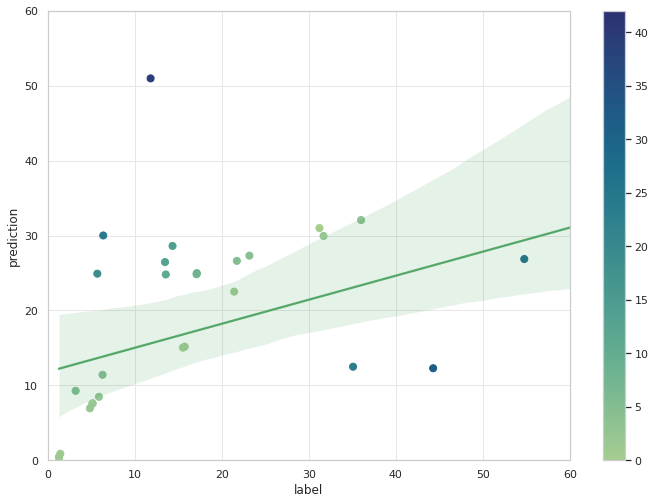

In [ ]:
# Visualising the Random Forest Regression results
mae = np.round(abs(Y_test - predictions))
d = {'label': Y_test, 'prediction': predictions, 'mae': mae}
plot = pd.DataFrame(data = d)
# plot absolute settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {"grid.color": ".9"})

points = plt.scatter(d["label"], d["prediction"], s=50, c=d["mae"], cmap="crest")
plt.colorbar(points)
plt.xlim(0, 60)
plt.ylim(0, 60)

sns.regplot(
    x="label", y="prediction", data=plot, scatter = False, color='g')
 

Absolute error in the test set plot

<AxesSubplot:xlabel='dataset', ylabel='Absolute error'>

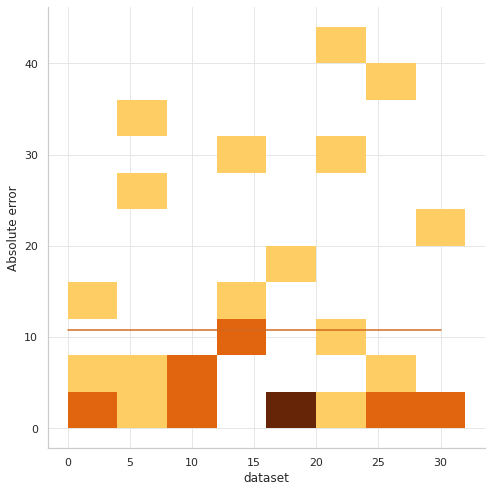

In [ ]:
# Visualising the Random Forest Regression results
n = (X_test.shape[0]) #number of data points


sns.set_style("whitegrid", {"grid.color": ".9"})
numbers = np.array(list(range(0,int(n),+1)))

value = np.round(abs(Y_test - predictions))
d = {'Absolute error': value, 'dataset': numbers}
plot = pd.DataFrame(data = d)

sns.displot(data = plot, x="dataset", y="Absolute error", height=7,
    aspect=1, binwidth=(4, 4), cmap="YlOrBr")

sns.lineplot(data = plot, x="dataset", y=MAE, color = 'chocolate')

Feature importance

In [ ]:
from scipy.special import softmax
from sklearn.feature_selection import SelectFwe, chi2

def print_feature_importances_random_forest(random_forest_model):
    
    '''
    Prints the feature importances of a Random Forest model in an ordered way.
    random_forest_model -> The sklearn.ensemble.RandomForestRegressor or RandomForestClassifier trained model
    '''
    
    # Fetch the feature importances and feature names
    importances = rf.feature_importances_
    features = h_X
    
    # Organize them in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

def print_feature_importances_shap_values(shap_values, features):
    
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''

    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
        
    # Calculates the normalized version
    importances_norm = softmax(importances)

    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
# Prints the feature importances
print_feature_importances_random_forest(rf)

AREA_F -> 0.2171
VOL -> 0.1756
YOC -> 0.1063
APT_NUM -> 0.0727
ZIPCODE_8052 -> 0.0429
ZIPCODE_8057 -> 0.0307
ST_NUM -> 0.0284
KREIS_6 -> 0.0245
ZIPCODE_8044 -> 0.0245
ZIPCODE_8049 -> 0.0235
KREIS_9 -> 0.0197
ZIPCODE_8006 -> 0.0184
ROOF_O -> 0.0182
ZIPCODE_8053 -> 0.0169
KREIS_11 -> 0.0165
ZIPCODE_8048 -> 0.0162
POC_8013 -> 0.0134
KREIS_10 -> 0.0125
ZIPCODE_8051 -> 0.0125
ZIPCODE_8032 -> 0.0119
ROOF_M -> 0.0108
KREIS_7 -> 0.0107
KREIS_12 -> 0.0100
ZIPCODE_8055 -> 0.0095
POC_8012 -> 0.0083
POC_8011c -> 0.0082
ROOF_P -> 0.0068
ZIPCODE_8002 -> 0.0060
KREIS_2 -> 0.0044
ZIPCODE_8050 -> 0.0034
POC_8014 -> 0.0034
ZIPCODE_8004 -> 0.0023
KREIS_4 -> 0.0022
POC_8011d -> 0.0022
ZIPCODE_8047 -> 0.0020
ROOF_F -> 0.0018
KREIS_3 -> 0.0016
ZIPCODE_8046 -> 0.0014
ZIPCODE_8038 -> 0.0008
ZIPCODE_8003 -> 0.0005
ZIPCODE_8005 -> 0.0004
KREIS_5 -> 0.0004
ZIPCODE_8045 -> 0.0002
POC_8015 -> 0.0002
ZIPCODE_8037 -> 0.0002
ZIPCODE_8008 -> 0.0001
KREIS_8 -> 0.0001
POC_8011b -> 0.0000


In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_list)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

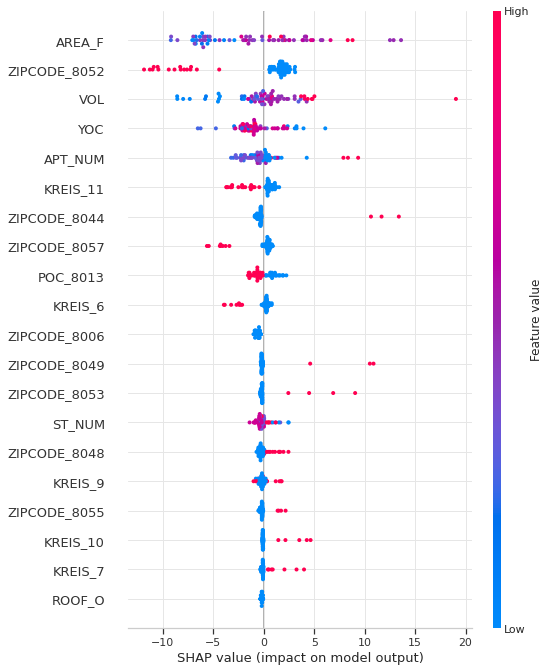

In [ ]:
shap.summary_plot(shap_values, feature_names = h_X)